In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matrice de confusion :
[[12  0]
 [ 0  8]]
Précision : 100.00%


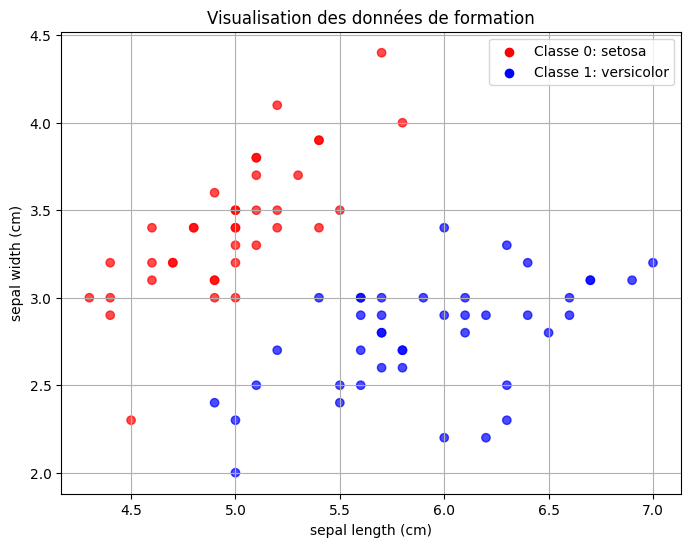

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Charger le dataset Iris
iris = datasets.load_iris()

# 2. Transformer le problème en classification binaire (classes 0 et 1)
# On prend uniquement les classes 'setosa' (0) et 'versicolor' (1)
x = iris.data[iris.target != 2]  # On prend uniquement les exemples dont la classe est 0 ou 1
y = iris.target[iris.target != 2]  # Les classes correspondantes

# 3. Diviser le jeu de données en ensemble d'entraînement et ensemble de test (80%/20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Créer et entraîner le modèle de régression logistique
modele = LogisticRegression()
modele.fit(x_train, y_train)

# 5. Prédire les classes pour l'ensemble de test
y_pred = modele.predict(x_test)

# 6. Évaluer le modèle avec une matrice de confusion et la précision
matrice_confusion = confusion_matrix(y_test, y_pred)
precision = accuracy_score(y_test, y_pred)

# Afficher les résultats
print("Matrice de confusion :")
print(matrice_confusion)
print(f"Précision : {precision * 100:.2f}%")

# Visualisation de la séparation des classes pour les deux premières caractéristiques
plt.figure(figsize=(8, 6))

# Associer les couleurs aux classes
colors = ['red' if label == 0 else 'blue' for label in y_train]

# Tracer les points d'entraînement
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors, alpha=0.7)

# Créer la légende dynamique
plt.scatter([], [], color='red', label='Classe 0: setosa')    # Ajouter une entrée pour setosa
plt.scatter([], [], color='blue', label='Classe 1: versicolor')  # Ajouter une entrée pour versicolor

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Visualisation des données de formation")
plt.legend()
plt.grid(True)
plt.show()

